# Recurrent Neural Networks (RNN)

> **RNN works on the principle of saving the output of a particular layer and feeding this back to the input in order to predict the output of the layer**

![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Network_framework.gif)

<!--- ![image.png](attachment:image.png) -->  

[RNN : src 🔗](https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn)

--- 
## Importing Dependencies:


In [144]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

import numpy as np
from matplotlib import pyplot as plt
import random


---
## Loading Dataset 
(here, we have used tensorflow mnist dataset, Handwritten digits and their labels)

In [38]:
data = tf.keras.datasets.mnist

#unpacking data:
#    images to x_train/x_test
#    labels to y_train/y_test
(x_train, y_train), (x_test, y_test) = data.load_data()

In [55]:
x_train = x_train/255.0
x_test = x_test/255.0

In [56]:
x_train.shape

(60000, 28, 28)

In [57]:
x_train[0].shape

(28, 28)

(28 x 28 pixels per image)


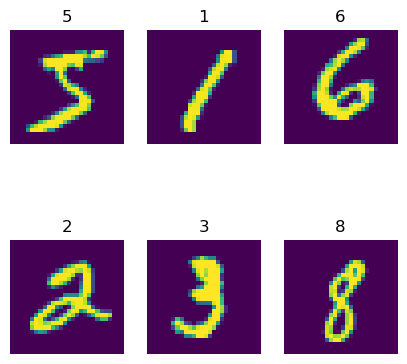

In [110]:
fig = plt.figure(figsize=(5, 5))
rows = 2
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(x_train[0])
plt.title(y_train[0])
plt.axis('off')

fig.add_subplot(rows, columns, 2)
plt.imshow(x_train[3])
plt.title(y_train[3])
plt.axis('off')

fig.add_subplot(rows, columns, 3)
plt.imshow(x_train[90])
plt.title(y_train[90])
plt.axis('off')

fig.add_subplot(rows, columns, 4)
plt.imshow(x_train[5])
plt.title(y_train[5])
plt.axis('off')

fig.add_subplot(rows, columns, 5)
plt.imshow(x_train[10])
plt.title(y_train[10])
plt.axis('off')

fig.add_subplot(rows, columns, 6)
plt.imshow(x_train[300])
plt.title(y_train[300])
plt.axis('off')


print("(28 x 28 pixels per image)")

---

## Model Formation:

In [101]:
# Loading Sequential Model for Layer Stacking
model = Sequential()

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*B0q2ZLsUUw31eEImeVf3PQ.png" />

In [102]:
x_train.shape[1:]

(28, 28)

In [103]:
# Adding Layers to loaded model as per requirement
# Here we will use LSTM and Dense

model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
# The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, 
# which helps prevent overfitting

model.add(LSTM(128, activation="relu"))
model.add(Dropout(0.1))

# Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. 
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 28, 128)           80384     
                                                                 
 dropout_3 (Dropout)         (None, 28, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [107]:
# Setting up an Optimizer

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-6)

# Compiling the model (Building up Neural Network)
model.compile(
loss='sparse_categorical_crossentropy',
optimizer=opt,
metrics=['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 28, 128)           80384     
                                                                 
 dropout_3 (Dropout)         (None, 28, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)               

--- 
## Training the model:

In [119]:
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0856 - accuracy: 0.9771 - val_loss: 0.0750 - val_accuracy: 0.9789
Epoch 2/3
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0685 - accuracy: 0.9814 - val_loss: 0.0604 - val_accuracy: 0.9823
Epoch 3/3
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0635 - accuracy: 0.9825 - val_loss: 0.0461 - val_accuracy: 0.9853


---
## Prediction:

In [121]:
y_predict = model.predict(x_test)

313/313 [==============================] - 3s 11ms/step


In [145]:
y_predict

array([[8.4546437e-10, 1.4604345e-07, 1.5191360e-07, ..., 9.9999917e-01,
        1.0026805e-08, 5.6614618e-07],
       [1.9909291e-17, 7.7764124e-13, 1.0000000e+00, ..., 7.9717449e-14,
        1.3160085e-18, 8.7198706e-21],
       [1.0385245e-09, 9.9999428e-01, 3.8903359e-08, ..., 2.4798669e-06,
        2.7429003e-06, 2.0740394e-07],
       ...,
       [1.0458551e-21, 1.3908685e-13, 2.3491046e-15, ..., 3.4881835e-09,
        5.2355772e-12, 3.9489551e-06],
       [1.7513496e-07, 5.8793921e-06, 3.6314975e-07, ..., 3.7292810e-07,
        1.6769183e-04, 5.3889627e-05],
       [3.2093667e-06, 4.4705444e-09, 3.7406696e-07, ..., 4.1019419e-12,
        8.6583140e-07, 1.3434739e-09]], dtype=float32)

In [146]:
y_predict.shape

(10000, 10)

(-0.5, 27.5, 27.5, -0.5)

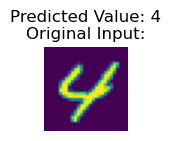

In [208]:
fig = plt.figure(figsize=(5, 5))
rows = 4
columns = 4

index = random.randint(0,9999)

fig.add_subplot(rows, columns, 1)
plt.imshow(x_test[index])
plt.title("Predicted Value: {}\nOriginal Input:".format(y_predict[index].argmax()))
plt.axis('off')


In [209]:
print("predicted value: {}".format(y_predict[index].argmax()))
print("Original test value: {}".format(y_test[index]))

predicted value: 4
Original test value: 4


---

## Deployment - Converting the trained model to Tensorflow lite model file 

In [ ]:
# import tensorflow as tf


converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# save the model
with open('mnist_model.tflite', 'wb') as f:
    f.write(tflite_model)